In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import multiprocessing
from multiprocessing.pool import ThreadPool

import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import tqdm
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
from data_io import load_data_by_ticker, get_call_data_for_given_ticker, display_all, display_shape, calls_amount

In [4]:
import matplotlib.font_manager as font_manager

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'NanumGothic'

# Target companies

# 할일
- 전체 합계(SKT) 수익률 계산
- 

# Input
- 치킨 + 다른 전화 주문량까지
- 모델에 넣고 돌려서 결과 보는걸로
- 합계도 
- 인터넷 주문량도 넣고

## 석유 및 
- 내용

## 1인가구 관련 키워드
- 저성장, 저출산이 키워드
- 명품
- 홈트레이닝
- 방송

## 치킨의 대체제
- 피자 등?
- 이벤트로 인한 하락을 경기하락으로 잘못 해석할 수 있음
- 인풋으로 코스피

## 치킨회사 관련된(네네치킨 등 )
- 하림 등
- 원재료 업체
- 기름

# Data

- 검색 키워드 : 배달앱 사용률, 공정거래위원회 배달앱 시장 규모, 배달의민족 데이터, 한국농수산식품유통공사 ‘외식트렌드조사 보고서’
- [Nielsen Koreanclick : Android Mobile App ‘배달의민족’, ‘요기요’ 4월 이용 행태 분석](http://www.koreanclick.com/insights/newsletter_view.html?code=topic&id=528&page=1)
- [2018 국내 외식 트렌드 조사 보고서 (※ 부록 : 외식 소비 행태 조사 통계(2016~2018년))](https://www.atfis.or.kr/fip/file/download.do?fileId=11242)
- [통계청 통계조사 : 온라인쇼핑동향조사 : 온라인쇼핑몰 판매매체별/상품군별거래액](http://kostat.go.kr/wnsearch/search.jsp)

## SKT 데이터

In [5]:
calls = pd.read_pickle('data/CALLS_TRANSFORMED.pkl')
display_shape(calls)

(2222, 318)


,월,요일,평균기온,최고기온,최저기온,일강수량,평균풍속,최다풍향,평균상대습도,가조시간,...,"중랑구, 20대, 남","중랑구, 20대, 여","중랑구, 30대, 남","중랑구, 30대, 여","중랑구, 40대, 남","중랑구, 40대, 여","중랑구, 50대, 남","중랑구, 50대, 여","중랑구, 60대, 남","중랑구, 60대, 여"
2013-08-01,8,목요일,28.0,24.5,32.1,0.0,1.7,50.0,67.3,14.1,...,79,91,98,133,62,88,33.0,55,NaN,6.0
2013-08-02,8,금요일,27.4,25.2,29.3,7.5,2.0,50.0,80.4,14.1,...,115,99,177,160,82,101,33.0,44,10.0,18.0
2013-08-03,8,토요일,28.9,26.7,32.6,0.1,3.7,230.0,72.3,14.0,...,174,164,169,207,108,136,36.0,48,17.0,19.0
2013-08-04,8,일요일,28.3,26.4,31.3,4.5,2.4,250.0,76.4,14.0,...,125,149,204,188,98,120,37.0,46,16.0,14.0
2013-08-05,8,월요일,27.7,26.4,30.1,7.0,3.2,230.0,78.9,14.0,...,95,70,103,117,56,65,30.0,28,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,8,화요일,25.7,22.2,29.3,20.0,1.0,290.0,71.1,13.2,...,28,18,24,20,25,44,12.0,8,8.0,10.0
2019-08-28,8,수요일,26.1,23.6,30.2,0.0,1.9,270.0,66.2,13.2,...,12,13,27,31,20,39,17.0,21,10.0,5.0
2019-08-29,8,목요일,23.4,20.1,26.4,36.9,2.2,160.0,77.1,13.1,...,10,15,13,15,24,37,9.0,18,11.0,10.0
2019-08-30,8,금요일,22.6,19.5,27.0,0.2,2.4,200.0,66.3,13.1,...,22,14,34,40,37,51,14.0,25,10.0,8.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


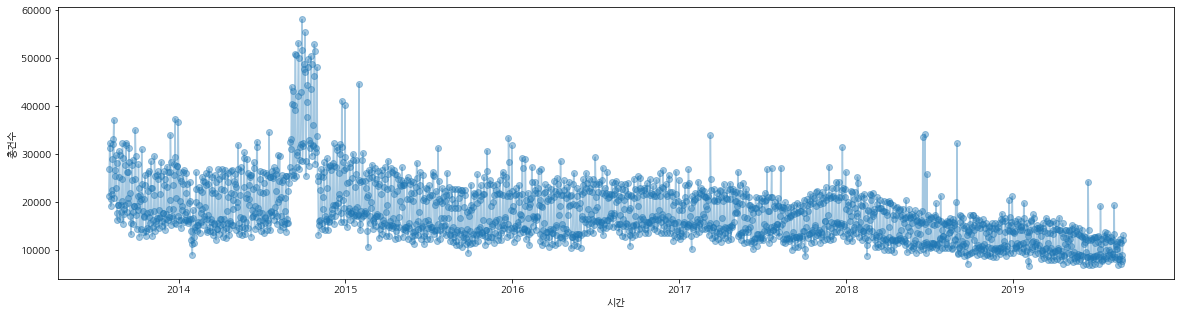

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(calls.index, calls['총건수'], alpha=0.4, marker='o')
plt.xlabel('시간')
plt.ylabel('총건수')
plt.show()

## 외식 트렌드 조사보고서 : 배달앱 인식
- 대상 : 전체 응답자

In [7]:
delivery_recognition = pd.read_csv('data/delivery_recognition.csv', index_col=[0,1], header=[0,1])
delivery_recognition = delivery_recognition[delivery_recognition.columns[:12]][:27]
display(delivery_recognition)

2016                            2017                           \
                 사례수 처음들어본다 들어본적있지만잘모른다 잘알고있다    사례수 처음들어본다 들어본적있지만잘모른다 잘알고있다   
전체    전체       3,040   26.6        57.1  16.3  3,014   20.2        59.7  20.1   
성별    남성       1,539   26.6        56.8  16.6  1,532   19.6        60.2  20.2   
      여성       1,501   26.7        57.4  15.9  1,482   20.8        59.2  20.0   
연령    20대        560   29,3        53,4  17.3    555   19,5        53.5  27,0   
      30대        666   24.6        55.6  19.8    606   16.2        55.4  28.4   
      40대        748   28.7        56.4  14.8    704   23.6        61.1  15.3   
      50대        678   25.4        58.6  16.1    690   20.6        63.9  15.5   
      60대        388   24.5        63.7  11.9    459   20.7        64.3  15.0   
거주지역  서울         620   17.9        61.6  20.5    600     13        59.5  27.5   
      6대광역시      800   28.6        57.5  13.9    771   23.3        59.7  17.0   
      경기도        721   26.2        55,5  18.3    749   17.6        61.7  20.7   
      기타         899   31.3        54.8  13.9    894   24.5        58.2  17.3   
총외식빈도 Light      897   29.0        57.3  13.7    785   22.5        60.1  17.3   
      Medium   1,221   25.7        58.3  16.0  1,329   19.9        60.3  19.9   
      Heavy      922   25.6        55.2  19.2    900   18.7        58.4  22.9   
직업    전문/기술직     380   31.3        52.6  16.1    387   18.1        59.2  22.7   
      행정/관리직     123   22.0        63.4  14.6    139   20.9        55.4  23.7   
      사무관리직    1,262   26.1        56.7  17.2  1,089   19.3        60.1  20.6   
      판매/서비스직    160   23.1        60.6  16.3    180   20.6        61.7  17.8   
      생산관련직       96   20.8        66.7  12.5    108     25        56.5  18.5   
      자영업        247   24.3        56.3  19.4    230   16.5        67.4  16.1   
      주부         357   26.3        59.1  14.6    441     22        61.5  16.6   
      학생         267   31.1        53.2  15.7    262   20.6        52.3  27.1   
      무직         109   29.4        55.0  15.6    122   28.7        57.4  13.9   
      기타          39   23.1        71.8   5.1     56   21.4        58.9  19.6   
결혼여부  기혼       1,933   26.0        58.3  15.8  1,936   20.2        62.0  17.8   
      미혼       1,107   27.8        55.0  17.2  1,078   20.1        55.6  24.3   

                2018                           
                 사례수 처음들어본다 들어본적있지만잘모른다 잘알고있다  
전체    전체       3,014    2.8        29.8  67.5  
성별    남성       1,532    2.9        29.7  67.4  
      여성       1,482    2.6        29.9  67.5  
연령    20대        555    3,4        12,4  84,1  
      30대        606    2.6        16.5  80.9  
      40대        704    2.3        30.5  67.2  
      50대        690    2.3        43.6  54.1  
      60대        459    3.5        46.4  50.1  
거주지역  서울         600    3.7        22.8  73.5  
      6대광역시      771    3.0        28.8  68.2  
      경기도        749    2.5        29.1  68.4  
      기타         894    2.1        35.9  62.0  
총외식빈도 Light      875    2.3        39.3  58.4  
      Medium   1,332    3.2        28.8  67.9  
      Heavy      807    2.5        21.1  76.5  
직업    전문/기술직     373    2.9        29.8  67.3  
      행정/관리직     117    2.6        32.5  65.0  
      사무관리직    1,247    2.5        26.9  70.6  
      판매/서비스직    166    2.4        32.5  65.1  
      생산관련직      115    3.5        33.0  63.5  
      자영업        218    3.2        35.3  61.5  
      주부         369    3.3        37.1  59.6  
      학생         200    4.0        12.5  83.5  
      무직         156    1.9        35.9  62.2  
      기타          53    0.0        49.1  50.9  
결혼여부  기혼       1,960    2.6        34.7  62.7  
      미혼       1,054    3.0        20.7  76.3

In [8]:
delivery_recognition_never_heard = np.array([26.6, 20.2, 2.8])
delivery_recognition_heard = np.array([100, 100, 100]) - delivery_recognition_never_heard # 0~100 사이의 백분율
delivery_recognition_heard_ratio = delivery_recognition_heard/100 # 0~1사이의 비율
print('전체 모집단 중 배달앱 인식자 비율 : ', delivery_recognition_heard_ratio)

전체 모집단 중 배달앱 인식자 비율 :  [0.734 0.798 0.972]


## 외식 트렌드 조사 보고서 : 배달앱 이용
- 대상 : 배달 서비스 어플리케이션 인지자(2.2의 배달앱 인식 관련 조사)

In [9]:
delivery_usage = pd.read_csv('data/delivery_usage.csv', index_col=[0,1], header=[0,1])
delivery_usage = delivery_usage[delivery_usage.columns[:10]][:27]
display(delivery_usage)

2016                 2017                 2018                 \
                 사례수 이용경험있다 이용경험없다    사례수 이용경험있다 이용경험없다    사례수 배달어플리케이션이용경험있다   
전체    전체       495.0   27.3   72.7  606.0   38.0   62.0  2,931           54.2   
성별    남성       256.0   30.5   69,5  309.0   41.1   58,9  1,487           53,5   
      여성       239.0   23.8   76,2  297.0   34.7   65.3  1,444           54,9   
연령    20대       97.0   27.8   72.2  150.0   42.0   58.0    536           80.4   
      30대      132.0   25.0   75,0  172.0   41.9   58.1    590           71,5   
      40대      111.0   28.8   71.2  108.0   38.0   62.0    688           47.4   
      50대      109.0   29.4   70.6  107.0   30.8   69.2    674           39,0   
      60대       46.0   23.9   76,1   69.0   30,4   69.6    443           33,2   
거주지역  서울       127.0   26.8   73.2  165.0   44.8   55.2    578           59.7   
      6대광역시    111.0   30.6   69.4  131.0   38,2   61,8    730           51.9   
      경기도      132.0   29.5   70,5  155.0   38.7   61.3    748           59.0   
      기타       125.0   22.4   77.6  155.0   29.7   70.3    875           48.5   
총외식빈도 Light    123.0   17.9   82.1  136.0   29.4   70,6    855           43.5   
      Medium   195.0   28.2   71.8  264.0   36.0   64.0  1,289           55.5   
      Heavy    177.0   32.8   67,2  206.0   46.1   53,9    787           63.8   
직업    전문/기술직    61.0   19.7   80,3   88.0   40.9   59.1    362           55,0   
      행정/관리직    18.0   33.3   66.7   33.0   27.3   72.7    114           49.1   
      사무관련직    217.0   25.8   74,2  224.0   41,1   58.9  1,216           56,9   
      판매/서비스직   26.0   50.0   50,0   32.0   31.3   68.8    162           51.9   
      생산관련직     12.0   50.0   50.0   20.0   40.0   60.0    111           47.7   
      자영업       48.0   37.5   62.5   37.0   32,4   67,6    211           49.8   
      주부        52.0   23.1   76.9   73.0   35.6   64.4    357           43.4   
      학생        42.0   16.7   83.3   71.0   38.0   62.0    192           81.3   
      무직        17.0   29.4   70.6   17.0   23,5   76,5    153           46.4   
      기타         2.0    0.0  100.0   11.0   54.5   45.5     53           34.0   
결혼여부  기혼       305.0   27.5   72.5  344.0   36.0   64.0  1,909           47.3   
      미혼       190.0   26.8   73.2  262.0   40.5   59.5  1,022           67.1   

                                       
              경험한적없다 배달대행어플리케이션이용경험있다  
전체    전체        38.0             24.3  
성별    남성        38.9             24,5  
      여성        37.2             24,2  
연령    20대       13.6             33.0  
      30대       21,0             32,2  
      40대       44.0             20.3  
      50대       52,1             20.0  
      60대       59,6             16,0  
거주지역  서울        31.8             33.9  
      6대광역시     37.8             26,3  
      경기도       34.6             22,5  
      기타        45.3             17.9  
총외식빈도 Light     49.2             17,9  
      Medium    36.5             25.4  
      Heavy     28.5             29.6  
직업    전문/기술직    39.0             25.4  
      행정/관리직    39.5             29.8  
      사무관련직     34.1             26.5  
      판매/서비스직   38.3             23.5  
      생산관련직     45.9             21.6  
      자영업       42,2             23,7  
      주부        48.2             19.9  
      학생        14.6             27.6  
      무직        51.6             15,0  
      기타        62.3             11.3  
결혼여부  기혼        44.0             22.9  
      미혼        26.9             26.9

## 년도별 배달앱 점유율
- 사용 데이터
    - 외식 트렌드 조사보고서 : 배달앱 인식
        - 대상 : 전체 응답자
    - 외식 트렌드 조사 보고서 : 배달앱 이용
        - 대상 : 배달 서비스 어플리케이션 인지자(2.2의 배달앱 인식 관련 조사)
- 배달앱 점유율 = 년도별 배달앱 인식자 수 비율 * 해당 비율 중 배달 서비스 어플리케이션 사용자 비율
    - 위와 같이 데이터를 이용해 계산함

전체 모집단 중 배달앱 인식자 비율 :  [0.734 0.798 0.972]
배달앱 사용 비율 (배달앱 인식자 중) :  [0.273 0.38  0.542]
모집단(전체 : 배달앱 인식자, 미인식자 모두 포함) 중 배달앱 사용 비율 (추정) :  [0.200382 0.30324  0.526824]


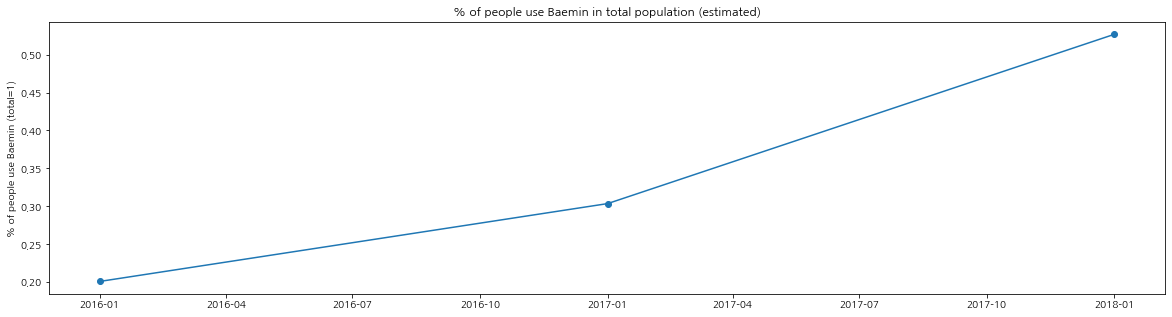

In [10]:
print('전체 모집단 중 배달앱 인식자 비율 : ', delivery_recognition_heard_ratio)

delivery_usage_used = np.array([27.3, 38.0, 54.2])
delivery_usage_used_ratio = delivery_usage_used/100
print('배달앱 사용 비율 (배달앱 인식자 중) : ', delivery_usage_used_ratio)

delivery_used_ratio_in_total_population = delivery_recognition_heard_ratio * delivery_usage_used_ratio
print('모집단(전체 : 배달앱 인식자, 미인식자 모두 포함) 중 배달앱 사용 비율 (추정) : ', delivery_used_ratio_in_total_population)
plt.figure(figsize=(20, 5))
plt.plot(pd.to_datetime(['2016', '2017', '2018']), delivery_used_ratio_in_total_population, marker='o')
plt.title('% of people use Baemin in total population (estimated)')
plt.ylabel('% of people use Baemin (total=1)')
plt.show()

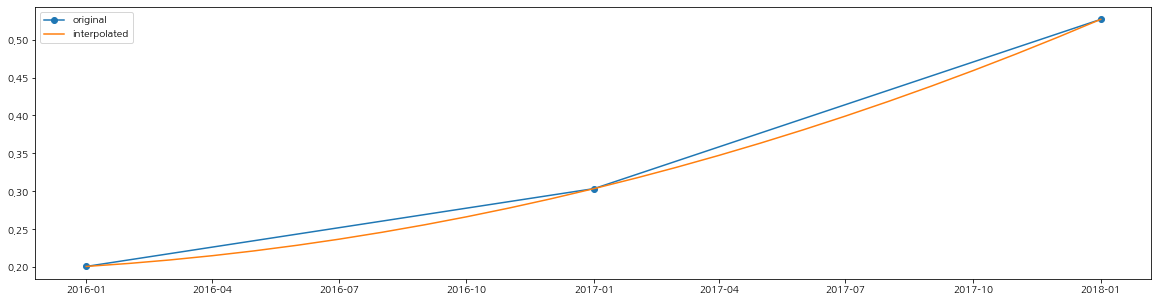

In [38]:
interpolated = pd.DataFrame(columns=['ratio'])
interpolated.loc[pd.to_datetime('2016-01')] = delivery_used_ratio_in_total_population[0]
for month in range(2, 13) : 
    interpolated.loc[pd.to_datetime('2016-%2s'%month)] = np.nan

interpolated.loc[pd.to_datetime('2017-01')] = delivery_used_ratio_in_total_population[1]
for month in range(2, 13) : 
    interpolated.loc[pd.to_datetime('2017-%2s'%month)] = np.nan
    
interpolated.loc[pd.to_datetime('2018-01')] = delivery_used_ratio_in_total_population[2]
for month in range(2, 13) : 
    interpolated.loc[pd.to_datetime('2018-%2s'%month)] = np.nan

interpolated_before = interpolated.copy()
interpolated_before.to_csv('metadata/interpolated_before.csv')

interpolated['ratio'] = interpolated['ratio'].interpolate(method='polynomial', order=2)
interpolated.to_csv('metadata/interpolated.csv')
plt.figure(figsize=(20, 5))
plt.plot(pd.to_datetime(['2016', '2017', '2018']), delivery_used_ratio_in_total_population, marker='o', label='original')
plt.plot(interpolated, label='interpolated')
plt.legend()
plt.show()

In [40]:
pd.read_csv('metadata/interpolated_before.csv')

,Unnamed: 0,ratio
0,2016-01-01,0.200382
1,2016-02-01,NaN
2,2016-03-01,NaN
3,2016-04-01,NaN
4,2016-05-01,NaN
5,2016-06-01,NaN
6,2016-07-01,NaN
7,2016-08-01,NaN
8,2016-09-01,NaN
9,2016-10-01,NaN


In [41]:
pd.read_csv('metadata/interpolated.csv')

,Unnamed: 0,ratio
0,2016-01-01,0.200382
1,2016-02-01,0.204384
2,2016-03-01,0.208917
3,2016-04-01,0.214607
4,2016-05-01,0.220942
5,2016-06-01,0.228347
6,2016-07-01,0.236342
7,2016-08-01,0.245462
8,2016-09-01,0.255453
9,2016-10-01,0.265953


## 통계청 온라인 쇼핑동향조사 : 상품군별 거래액

In [47]:
kospi_ecommerce_2013_2017 = pd.read_csv('data/kospi_ecommerce(201301-201712).csv', index_col=[0,1])
display(kospi_ecommerce_2013_2017)

2013. 01   2013. 02   2013. 03   2013. 04   2013. 05  \
상품군별     판매매체별                                                          
합계       합계     3,189,033  2,752,824  3,033,675  3,014,762  3,170,619   
NaN      인터넷쇼핑  2,815,624  2,405,536  2,626,963  2,606,326  2,718,382   
         모바일쇼핑    373,409    347,288    406,712    408,436    452,237   
컴퓨터및주변기기 합계             0          0          0          0          0   
NaN      인터넷쇼핑          0          0          0          0          0   
...                   ...        ...        ...        ...        ...   
         인터넷쇼핑          -          -          -          -          -   
         모바일쇼핑          -          -          -          -          -   
　　　애완용품  합계             -          -          -          -          -   
NaN      인터넷쇼핑          -          -          -          -          -   
         모바일쇼핑          -          -          -          -          -   

                 2013. 06   2013. 07   2013. 08   2013. 09   2013. 10  ...  \
상품군별     판매매체별                                                         ...   
합계       합계     3,069,652  3,370,180  3,162,920  3,129,159  3,408,849  ...   
NaN      인터넷쇼핑  2,582,381  2,831,265  2,582,185  2,519,382  2,729,930  ...   
         모바일쇼핑    487,271    538,915    580,735    609,777    678,919  ...   
컴퓨터및주변기기 합계             0          0          0          0          0  ...   
NaN      인터넷쇼핑          0          0          0          0          0  ...   
...                   ...        ...        ...        ...        ...  ...   
         인터넷쇼핑          -          -          -          -          -  ...   
         모바일쇼핑          -          -          -          -          -  ...   
　　　애완용품  합계             -          -          -          -          -  ...   
NaN      인터넷쇼핑          -          -          -          -          -  ...   
         모바일쇼핑          -          -          -          -          -  ...   

                 2017. 03   2017. 04   2017. 05   2017. 06   2017. 07  \
상품군별     판매매체별                                                          
합계       합계     6,500,415  6,217,672  6,495,160  6,398,003  6,783,040   
NaN      인터넷쇼핑  2,698,442  1,990,383  2,564,860  2,571,712  2,628,748   
         모바일쇼핑  3,801,973  4,227,289  3,930,300  3,826,291  4,154,292   
컴퓨터및주변기기 합계       425,992    333,503    320,522    337,575    352,711   
NaN      인터넷쇼핑    279,416    159,354    214,791    228,069    228,800   
...                   ...        ...        ...        ...        ...   
         인터넷쇼핑     75,151     40,980     73,636     79,118     69,791   
         모바일쇼핑     69,463     95,659     69,743     78,005     68,923   
　　　애완용품  합계        35,302     34,384     36,919     36,678     39,583   
NaN      인터넷쇼핑     11,423      6,046     11,551     11,305     11,509   
         모바일쇼핑     23,879     28,338     25,369     25,373     28,074   

                 2017. 08   2017. 09   2017. 10   2017. 11   2017. 12  
상품군별     판매매체별                                                         
합계       합계     6,675,062  6,905,823  6,507,896  7,693,426  7,577,965  
NaN      인터넷쇼핑  2,586,174  2,704,518  2,444,311  2,928,876  2,812,661  
         모바일쇼핑  4,088,888  4,201,306  4,063,585  4,764,550  4,765,305  
컴퓨터및주변기기 합계       374,439    360,797    316,786    420,468    443,185  
NaN      인터넷쇼핑    239,263    232,394    199,740    268,630    290,298  
...                   ...        ...        ...        ...        ...  
         인터넷쇼핑     93,000     96,794     78,045     75,030    103,489  
         모바일쇼핑     52,813     63,705     54,892    101,554    125,525  
　　　애완용품  합계        40,996     41,755     39,718     57,191     49,347  
NaN      인터넷쇼핑     11,162     11,246     10,517     14,798     13,505  
         모바일쇼핑     29,833     30,509     29,200     42,392     35,842  

[78 rows x 60 columns]